In [7]:
from selenium import webdriver
import time
import pandas as pd
from math import ceil
import csv
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

## library untuk preprocessing teks
import csv 
import re 
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.style.use('ggplot')
sns.set_style('whitegrid')

In [135]:
df = pd.read_csv("D:\phytonwork\output_sentiment.csv",encoding='ISO-8859-1')

In [136]:
df

,comment,sentiment
0,HP semahal apa pun klo mau internetan tetap ba...,negtive
1,Ada kekurangan dari hp itu\n1.Terlalu mahal\n2...,positive
2,"Canggih, lama2 Hp bisa mirip yg punya tony sta...",positive
3,"huawei: go ahead,we are watching",positive
4,"arghhhh... apalah dayaku sm hp kentangg gw, di...",negtive
...,...,...
294,Ampun gan...kemahalan...sukses buat chanel gad...,negtive
295,Keren kak,positive
296,Keren,positive
297,Hp nya ribet banget anying,negtive


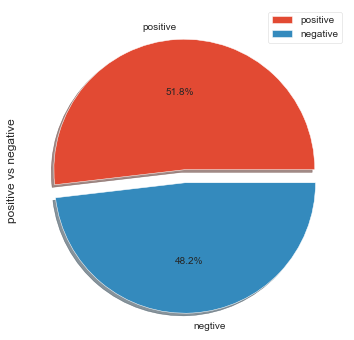

In [137]:
df["sentiment"].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%',shadow=True)
plt.ylabel("positive vs negative")
plt.legend(["positive","negative"])
plt.show()

In [138]:
df['length']=df['comment'].apply(len)
df.head()

,comment,sentiment,length
0,HP semahal apa pun klo mau internetan tetap ba...,negtive,60
1,Ada kekurangan dari hp itu\n1.Terlalu mahal\n2...,positive,74
2,"Canggih, lama2 Hp bisa mirip yg punya tony sta...",positive,60
3,"huawei: go ahead,we are watching",positive,32
4,"arghhhh... apalah dayaku sm hp kentangg gw, di...",negtive,96


In [139]:
df["commentLength"]=df["comment"].apply(len)
df["commentLength"].describe()

count    299.000000
mean      42.735786
std       31.364716
min        3.000000
25%       19.000000
50%       36.000000
75%       60.000000
max      242.000000
Name: commentLength, dtype: float64

# Cleaning Data

In [140]:
def clean_text(text):
  text=text.lower()
  text=re.sub("@[^\s]+", "", text)
  text=re.sub("\w*\d\w", "", text)
  text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', "", text)
  text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', "", text)
  text=re.sub("#[^\s]+", "", text)
  text=re.sub(r'\b[a-zA-Z]\b', "", text)
  return text

clean = lambda x: clean_text(x)

In [141]:
print("karena yang akan di praproses adalah kolom comment yang berisi text, maka kita buat dataframe baru yaitu dfx yang khusus berisi comment yang akan kita praproses saja.")

karena yang akan di praproses adalah kolom comment yang berisi text, maka kita buat dataframe baru yaitu dfx yang khusus berisi comment yang akan kita praproses saja.


In [142]:
dfx=pd.DataFrame(df.comment.apply(clean))
dfx

,comment
0,hp semahal apa pun klo mau internetan tetap ba...
1,ada kekurangan dari hp itu\n mahal\n mahal\n m...
2,"canggih, lama2 hp bisa mirip yg punya tony stark"
3,"huawei: go ahead,we are watching"
4,"arghhhh... apalah dayaku sm hp kentangg gw, di..."
...,...
294,ampun buat chanel gadgetin-nya bang banyak m...
295,keren kak
296,keren
297,hp nya ribet banget anying


In [143]:
def Punctuation(string):
  punctuation='''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
  for x in string.lower():
    if x in punctuation:
      string = string.replace(x, "")

  return(string)

cleanPunc = lambda x: Punctuation(x)

In [144]:
dfx=pd.DataFrame(df.comment.apply(cleanPunc))
dfx

,comment
0,HP semahal apa pun klo mau internetan tetap ba...
1,Ada kekurangan dari hp itu\n1Terlalu mahal\n2T...
2,Canggih lama2 Hp bisa mirip yg punya tony star...
3,huawei go aheadwe are watching
4,arghhhh apalah dayaku sm hp kentangg gw dikate...
...,...
294,Ampun gankemahalansukses buat chanel gadgetInn...
295,Keren kak
296,Keren
297,Hp nya ribet banget anying


In [145]:
def get_stopword(stopwordsfile):
  stopwords=[]
  file_stopwords=open(stopwordsfile, 'r')
  row= file_stopwords.readline()
  while row:
    word=row.strip()
    stopwords.append(word)
    row=file_stopwords.readline()
  file_stopwords.close()
  return stopwords

In [146]:
stop_words_indo=get_stopword("D:/phytonwork/stopwordsindo.txt")

In [147]:
def stopwords(text):
  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil=' '.join(filtered)
  return hasil

st=lambda x: stopwords(x)

In [148]:
dfx = pd.DataFrame(dfx.comment.apply(st))
dfx.head()

,comment
0,HP semahal klo internetan bayar pake kuota
1,Ada kekurangan hp 1Terlalu mahal 2Terlalu maha...
2,Canggih lama2 Hp yg tony stark nihhahah
3,huawei go aheadwe are watching
4,arghhhh apalah dayaku sm hp kentangg gw dikate...


In [149]:
def stemming(text):
  factory_stem=StemmerFactory()
  stemmer=factory_stem.create_stemmer()
  text=stemmer.stem(text)
  return text

stem = lambda x: stemming(x)

In [150]:
dfx = pd.DataFrame(dfx.comment.apply(stem))
dfx.head()

,comment
0,hp mahal klo internetan bayar pake kuota
1,ada kurang hp 1terlalu mahal 2terlalu mahal 3t...
2,canggih lama2 hp yg tony stark nihhahah
3,huawei go aheadwe are watching
4,arghhhh apa daya sm hp kentangg gw kate nih ye...


In [151]:
dfx["sentiment"]=df["sentiment"]
dfx

,comment,sentiment
0,hp mahal klo internetan bayar pake kuota,negtive
1,ada kurang hp 1terlalu mahal 2terlalu mahal 3t...,positive
2,canggih lama2 hp yg tony stark nihhahah,positive
3,huawei go aheadwe are watching,positive
4,arghhhh apa daya sm hp kentangg gw kate nih ye...,negtive
...,...,...
294,ampun gankemahalansukses chanel gadgetinnya ba...,negtive
295,keren kak,positive
296,keren,positive
297,hp nya ribet banget anying,negtive


# SKENARIO 1 

In [152]:
## library untuk vectorized
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

## library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

## library untuk evaluasi 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [153]:
vectorizer = TfidfVectorizer(use_idf=True, strip_accents="ascii")

In [154]:
y=dfx.sentiment
X=dfx.comment

In [155]:
X_v=vectorizer.fit_transform(X)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [157]:
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect=vectorizer.transform(X_test)

mnb = MultinomialNB()

mnb.fit(X_train_vect, y_train)
y_pred = mnb.predict(X_test_vect)

accuracy_score(y_test, y_pred)

0.6333333333333333

0       negtive
1      positive
2      positive
3      positive
4       negtive
         ...   
294     negtive
295    positive
296    positive
297     negtive
298    positive
Name: sentiment, Length: 299, dtype: object

In [158]:
from sklearn.metrics import classification_report, confusion_matrix


In [159]:
print(confusion_matrix(y_test, y_pred))

[[27 11]
 [22 30]]


In [160]:
print(classification_report(y_test, y_pred, zero_division="warn"))

              precision    recall  f1-score   support

     negtive       0.55      0.71      0.62        38
    positive       0.73      0.58      0.65        52

    accuracy                           0.63        90
   macro avg       0.64      0.64      0.63        90
weighted avg       0.66      0.63      0.63        90



In [161]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [162]:
print("MNB")
scores_accuracy_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_mnb.mean(), scores_accuracy_mnb.std()))

scores_precision_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_mnb.mean(), scores_precision_mnb.std()))

scores_recall_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_mnb.mean(), scores_recall_mnb.std()))

scores_f1_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_mnb.mean(), scores_f1_mnb.std()))

MNB
Rata-rata nilai akurasi: 0.67 (+/- 0.10)
Rata-rata nilai precision macro: 0.67 (+/- 0.11)
Rata-rata nilai recall macro: 0.67 (+/- 0.11)
Rata-rata nilai f1 macro: 0.67 (+/- 0.11)


# SKENARIO 2

In [163]:
dfnew=pd.read_csv("D:\phytonwork\output_sentiment.csv",encoding='ISO-8859-1')

In [66]:
def clean_text(text):
  text=text.lower()
  text=re.sub("@[^\s]+", "", text)
  text=re.sub("\w*\d\w", "", text)
  text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', "", text)
  text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', "", text)
  text=re.sub("#[^\s]+", "", text)
  text=re.sub(r'\b[a-zA-Z]\b', "", text)
  return text

clean = lambda x: clean_text(x)

In [164]:
dfnew=pd.DataFrame(df.comment.apply(clean))
dfnew

,comment
0,hp semahal apa pun klo mau internetan tetap ba...
1,ada kekurangan dari hp itu\n mahal\n mahal\n m...
2,"canggih, lama2 hp bisa mirip yg punya tony stark"
3,"huawei: go ahead,we are watching"
4,"arghhhh... apalah dayaku sm hp kentangg gw, di..."
...,...
294,ampun buat chanel gadgetin-nya bang banyak m...
295,keren kak
296,keren
297,hp nya ribet banget anying


In [68]:
def Punctuation(string):
  punctuation='''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
  for x in string.lower():
    if x in punctuation:
      string = string.replace(x, "")

  return(string)

cleanPunc = lambda x: Punctuation(x)

In [165]:
dfnew=pd.DataFrame(df.comment.apply(cleanPunc))
dfnew

,comment
0,HP semahal apa pun klo mau internetan tetap ba...
1,Ada kekurangan dari hp itu\n1Terlalu mahal\n2T...
2,Canggih lama2 Hp bisa mirip yg punya tony star...
3,huawei go aheadwe are watching
4,arghhhh apalah dayaku sm hp kentangg gw dikate...
...,...
294,Ampun gankemahalansukses buat chanel gadgetInn...
295,Keren kak
296,Keren
297,Hp nya ribet banget anying


In [70]:
def stopwords(text):
  tokens = word_tokenize(text)
  filtered = []

  for w in tokens:
    if w not in stop_words_indo:
      filtered.append(w)

  hasil=' '.join(filtered)
  return hasil

st=lambda x: stopwords(x)

In [254]:
dfnew = pd.DataFrame(dfx.comment.apply(st))
dfnew.head()

,comment
0,hp mahal klo internetan bayar pake kuota
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal
2,canggih lama2 hp yg tony stark nihhahah
3,huawei go aheadwe are watching
4,arghhhh daya sm hp kentangg gw kate nih yeee 3...


In [255]:
dfnew["sentiment"]=df["sentiment"]
dfnew

,comment,sentiment
0,hp mahal klo internetan bayar pake kuota,negtive
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal,positive
2,canggih lama2 hp yg tony stark nihhahah,positive
3,huawei go aheadwe are watching,positive
4,arghhhh daya sm hp kentangg gw kate nih yeee 3...,negtive
...,...,...
294,ampun gankemahalansukses chanel gadgetinnya ba...,negtive
295,keren kak,positive
296,keren,positive
297,hp nya ribet banget anying,negtive


In [265]:
xdata=dfnew.drop('comment',axis=1)
ydata=dfnew.sentiment

In [266]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=0.3,random_state=1)

In [269]:
## library untuk pemodelan klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

## library untuk evaluasi 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

In [273]:
#Sentiment Analysis TEXTBLOB
def get_polarity(comment):
    return TextBlob(comment).sentiment.polarity

dfnew['Polarity'] = dfnew['comment'].apply(get_polarity)

In [274]:
dfnew

,comment,sentiment,Polarity
0,hp mahal klo internetan bayar pake kuota,negtive,0.0
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal,positive,0.0
2,canggih lama2 hp yg tony stark nihhahah,positive,-0.2
3,huawei go aheadwe are watching,positive,0.0
4,arghhhh daya sm hp kentangg gw kate nih yeee 3...,negtive,0.0
...,...,...,...
294,ampun gankemahalansukses chanel gadgetinnya ba...,negtive,0.0
295,keren kak,positive,0.0
296,keren,positive,0.0
297,hp nya ribet banget anying,negtive,0.0


In [275]:
dfnew['Sentiment_Type']=''
dfnew.loc[dfnew.Polarity>=0,'Sentiment_Type']='POSITIVE'
dfnew.loc[dfnew.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [276]:
dfnew

,comment,sentiment,Polarity,Sentiment_Type
0,hp mahal klo internetan bayar pake kuota,negtive,0.0,POSITIVE
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal,positive,0.0,POSITIVE
2,canggih lama2 hp yg tony stark nihhahah,positive,-0.2,NEGATIVE
3,huawei go aheadwe are watching,positive,0.0,POSITIVE
4,arghhhh daya sm hp kentangg gw kate nih yeee 3...,negtive,0.0,POSITIVE
...,...,...,...,...
294,ampun gankemahalansukses chanel gadgetinnya ba...,negtive,0.0,POSITIVE
295,keren kak,positive,0.0,POSITIVE
296,keren,positive,0.0,POSITIVE
297,hp nya ribet banget anying,negtive,0.0,POSITIVE


In [277]:
def sentiment_type (row):
    if row['Sentiment_Type']=='POSITIVE' :
        return 1
    elif row['Sentiment_Type']=='NEGATIVE':
        return 0

In [279]:
dfnew['Sentiment_Type']=dfnew.apply(lambda row: sentiment_type(row),axis=1)
dfnew.head(3)

,comment,sentiment,Polarity,Sentiment_Type
0,hp mahal klo internetan bayar pake kuota,negtive,0.0,1
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal,positive,0.0,1
2,canggih lama2 hp yg tony stark nihhahah,positive,-0.2,0


In [283]:
def sentiment (row):
    if row['sentiment']=='Positive' or row['sentiment']=='positive' :
        return 1
    elif row['sentiment']=='Negative' or row['sentiment']=='negtive':
        return 0

In [284]:
dfnew['sentiment']=dfnew.apply(lambda row: sentiment(row),axis=1)
dfnew.head(3)

,comment,sentiment,Polarity,Sentiment_Type
0,hp mahal klo internetan bayar pake kuota,0,0.0,1
1,hp 1terlalu mahal 2terlalu mahal 3terlalu mahal,1,0.0,1
2,canggih lama2 hp yg tony stark nihhahah,1,-0.2,0


In [286]:
dfnew['sentiment'].value_counts()

1    155
0    144
Name: sentiment, dtype: int64

In [288]:
dfnew['Sentiment_Type'].value_counts()

1    296
0      3
Name: Sentiment_Type, dtype: int64

In [289]:
dfnew = dfnew.drop('comment', axis=1)

In [290]:
dfnew = dfnew.drop('Polarity', axis=1)

In [291]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nanda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [293]:
# Variabel independen
x = dfnew.drop(["Sentiment_Type"], axis = 1)
# Variabel dependen
y = dfnew["Sentiment_Type"]

In [308]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [309]:
modelnb = GaussianNB()

In [310]:
nbtrain = modelnb.fit(xtrain, ytrain)
nbtrain.class_count_

array([  3., 236.])

In [319]:
nbtrain

GaussianNB()

In [312]:
xtrain


,sentiment
236,1
102,1
196,1
53,1
105,1
...,...
106,0
83,0
17,1
230,1


In [313]:
from sklearn import metrics
ypred_nb = nbtrain.predict(xtest)
ypredtrain=nbtrain.predict(xtrain)

In [314]:
#jenis pembagian data cross-val
from sklearn.model_selection import cross_val_score

In [315]:
print("Akurasi Data Train",metrics.accuracy_score(ytrain,ypredtrain)*100)
print("Akurasi Data Test",metrics.accuracy_score(ytest,ypred_nb)*100)

Akurasi Data Train 98.74476987447699
Akurasi Data Test 100.0


In [316]:
#EVALUASI MODEL - CONFUSION MATRIX (AKURASI, PRECISION, RECALL, F1 SCORE)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred_nb))

[[60]]


In [301]:
pd.crosstab(y_test,ypred_nb, rownames=['Actual'], colnames = ['Predicted'], margins=True)

Predicted,1,All
Actual,,
1,60,60
All,60,60


In [302]:
#hitung nilai akurasim precision, recall dan F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_nb))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [306]:
print("MNB")
scores_accuracy_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='accuracy')
print("Rata-rata nilai akurasi: %0.2f (+/- %0.2f)" % (scores_accuracy_mnb.mean(), scores_accuracy_mnb.std()))

scores_precision_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='precision_macro')
print("Rata-rata nilai precision macro: %0.2f (+/- %0.2f)" % (scores_precision_mnb.mean(), scores_precision_mnb.std()))

scores_recall_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='recall_macro')
print("Rata-rata nilai recall macro: %0.2f (+/- %0.2f)" % (scores_recall_mnb.mean(), scores_recall_mnb.std()))

scores_f1_mnb = cross_val_score(mnb, X_v, y, cv=10, scoring='f1_macro')
print("Rata-rata nilai f1 macro: %0.2f (+/- %0.2f)" % (scores_f1_mnb.mean(), scores_f1_mnb.std()))

MNB
Rata-rata nilai akurasi: 0.99 (+/- 0.02)
Rata-rata nilai precision macro: 0.84 (+/- 0.24)
Rata-rata nilai recall macro: 0.85 (+/- 0.23)
Rata-rata nilai f1 macro: 0.85 (+/- 0.23)


C:\Users\nanda\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramet